# Regressão Linear com Zombie Health
## Altura x Peso

Importando o arquivo CSV com o Pandas.

In [ ]:
!pip install matplotlib
!pip install scipy
!pip install statsmodels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/zombie/zombie-health/zombies-survey.csv')
df.head(10)

,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,1.88,109.72,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,1.75,73.62,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,1.88,96.50,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,1.82,99.81,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,1.77,93.60,0.8,14,5.0,3.6
5,Oshor Geactong,biological,male,1.71,69.04,1.6,17,5.4,3.9
6,Glitcolch Threbbalgo,biological,male,1.75,83.43,1.2,14,4.6,3.4
7,Giemmedd Ark,biological,male,1.74,76.19,0.8,15,5.0,3.4
8,Nesp Natho,biological,male,1.70,79.80,0.8,14,4.4,2.9
9,Mapmo Ondrath,biological,male,1.61,70.94,0.4,15,4.9,3.1


## Scatter plot da Altura x Peso de Recuperação

<AxesSubplot:xlabel='height', ylabel='weight'>

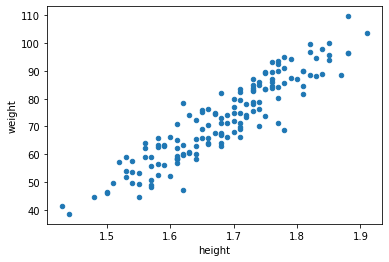

In [2]:
df.plot.scatter(x='height', y='weight')

## Estimando a Regressão Linear usando Least Squares  (via SciPy)

In [3]:
from scipy import stats
x = df['height']
y = df['weight']
a, b, r, p, std_err = stats.linregress(x, y)

## Plotando a função linear estimada x dados da amostra

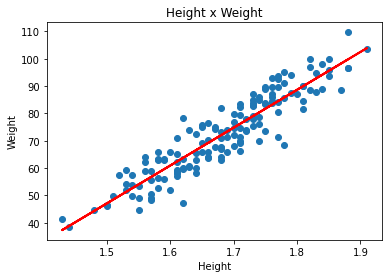

In [12]:
def estimate_y(x):
  return a * x + b

df['y_estimated'] = df['height'].apply(estimate_y)

plt.figure()
plt.plot(df['height'], df['weight'], 'o')
plt.plot(df['height'], df['y_estimated'], 'r', linewidth=2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height x Weight')
plt.show()

## Intercept, Height e R2

In [5]:
print("Intercept: %f" % a)
print("Height: %f" % b)
print("R-squared: %f" % r**2)

Intercept: 138.630118
Height: -160.886089
R-squared: 0.851199


## Estimando a Regressão Linear usando Ordinary Least Squares (OLS) - via Statsmodels

In [6]:
from statsmodels.formula.api import ols

model = ols("height ~ weight", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     846.6
Date:                Tue, 11 May 2021   Prob (F-statistic):           4.20e-63
Time:                        15:20:47   Log-Likelihood:                 276.18
No. Observations:                 150   AIC:                            -548.4
Df Residuals:                     148   BIC:                            -542.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2383      0.016     79.345      0.000       1.207       1.269
weight         0.0061      0.000     29.097      0.000       0.006       0.007
==============================================================================
Omnibus:                        1.192   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.125
Skew:                           0.210   Prob(JB):                        0.570
Kurtosis:                       2.939   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""